# Introduction

In this notebook we try to let a MLP learn a non-linear test function, here: f(x)=x^2

There are two common pifalls:
- Pitfall #1: no data scaling --> MLP will have severe problems to find the right weights
- Pitfall #2: only using linear activation functions --> MLP then cannot learn such non-linear functions

This notebook is set up such that you can test both pitfalls with the following boolean switches:

In [1]:
# Set this to "True" if you want to test what happens with no data scaling
pitfall1 = False

# Set this to "True" if you want to test what happens with using only linear activation functions
pitfall2 = False

# Check dependencies

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt

3.1.3


In [4]:
import numpy as np
print(np.__version__)

1.18.1


In [5]:
import random

# Try to learn `f(x)=x^2`

## Prepare some example data

In [6]:
x = np.arange(-20.0, 20.0, 0.2)

if not pitfall1:
    # It really helps to map/scale your
    # inputs / outputs to [0,1]
    # --> training of the NN will be much faster
    max_value = max(x)
    x = x/max_value

y = x**2

In [7]:
type(x)

numpy.ndarray

In [8]:
x.shape

(200,)

In [9]:
type(y)

numpy.ndarray

In [10]:
y.shape

(200,)

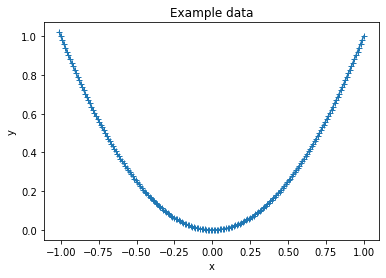

In [11]:
plt.plot(x,y,marker="+")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example data")
plt.show()

## Shuffle the example data

In [12]:
combined = list(zip(x,y))

In [13]:
combined[:10]

[(-1.0101010101010175, 1.020304050607096),
 (-1.0000000000000073, 1.0000000000000147),
 (-0.9898989898989973, 0.9799000102030551),
 (-0.9797979797979871, 0.9600040812162167),
 (-0.9696969696969769, 0.9403122130394999),
 (-0.9595959595959668, 0.9208244056729042),
 (-0.9494949494949566, 0.9015406591164302),
 (-0.9393939393939466, 0.8824609733700778),
 (-0.9292929292929364, 0.8635853484338465),
 (-0.9191919191919262, 0.8449137843077367)]

In [14]:
random.shuffle(combined)

In [15]:
x,y = zip(*combined)
x = np.array(x)
y = np.array(y)

In [16]:
x[:10]

array([-0.2020202 ,  0.82828283,  0.01010101,  0.04040404,  0.29292929,
        0.91919192, -0.21212121,  0.45454545,  0.67676768, -0.52525253])

In [17]:
y[:10]

array([4.08121620e-02, 6.86052444e-01, 1.02030405e-04, 1.63248648e-03,
       8.58075707e-02, 8.44913784e-01, 4.49954086e-02, 2.06611570e-01,
       4.58014488e-01, 2.75890215e-01])

## Split example data into training and test data

In [18]:
N = len(x)
N

200

In [19]:
x.shape

(200,)

In [20]:
x = x.reshape((N,1))
y = y.reshape((N,1))

In [21]:
x.shape

(200, 1)

In [22]:
y.shape

(200, 1)

In [23]:
M = N//2
M

100

In [24]:
x_train = x[:M]
y_train = y[:M]
x_test  = x[M:]
y_test  = y[M:]

In [25]:
x_train.shape

(100, 1)

In [26]:
y_train.shape

(100, 1)

In [27]:
x_train[:10]

array([[-0.2020202 ],
       [ 0.82828283],
       [ 0.01010101],
       [ 0.04040404],
       [ 0.29292929],
       [ 0.91919192],
       [-0.21212121],
       [ 0.45454545],
       [ 0.67676768],
       [-0.52525253]])

In [28]:
y_train[:10]

array([[4.08121620e-02],
       [6.86052444e-01],
       [1.02030405e-04],
       [1.63248648e-03],
       [8.58075707e-02],
       [8.44913784e-01],
       [4.49954086e-02],
       [2.06611570e-01],
       [4.58014488e-01],
       [2.75890215e-01]])

## Prepare a MLP

In [29]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()

if pitfall2:
    """
    this corresponds to the
    activation function f(act) = act,
    i.e., the identity function
    
    Quote from:
    https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions
      'When multiple layers use the identity activation
       function, the entire network is equivalent to a
       single-layer model.''
    """
    act_function = None
else:
    act_function = "relu"

model.add(keras.layers.Dense(50,
                             activation=act_function,
                             input_shape=(1,)
                            )
         )
model.add(keras.layers.Dense(1,
                             activation="linear"))

model.compile(optimizer='adam',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


## Train the MLP

In [30]:
# Check for nan values in the input and target data
print( sum(np.isnan(x_train)) )
print( sum(np.isnan(y_train)) )

[0]
[0]


In [31]:
history = model.fit(x_train,
                    y_train,
                    batch_size = 1,
                    epochs=100)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 0s 4ms/sample - loss: 0.1254 - accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0486 - accuracy: 0.0100
Epoch 3/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0322 - accuracy: 0.0100
Epoch 4/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0234 - accuracy: 0.0100
Epoch 5/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0172 - accuracy: 0.0100
Epoch 6/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0126 - accuracy: 0.0100
Epoch 7/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0097 - accuracy: 0.0100
Epoch 8/100
100/100 [==============================] - 0s 3ms/sample - loss: 0.0075 - accuracy: 0.0100
Epoch 9/100
100/100 [==============================] - 0s 2ms/sample - loss: 0.0060 - accuracy: 0.0100
Epoch 10/100
100/100 [==========================

## Test the model

In [32]:
preds = model.predict(x_test)

In [33]:
type(preds)

numpy.ndarray

In [34]:
preds.shape

(100, 1)

In [35]:
preds[:10]

array([[0.07557129],
       [0.51138616],
       [0.7667841 ],
       [0.09448943],
       [0.02544974],
       [0.06092919],
       [0.00879875],
       [0.07070715],
       [0.29274535],
       [0.45177785]], dtype=float32)

In [36]:
y_test[:10]

array([[0.07438017],
       [0.51433527],
       [0.75461688],
       [0.09182736],
       [0.02611978],
       [0.05876951],
       [0.00826446],
       [0.06897255],
       [0.28660341],
       [0.44444444]])

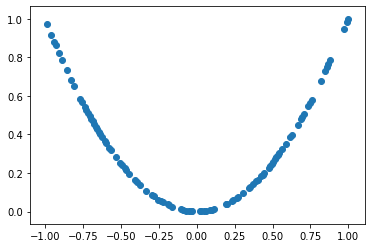

In [37]:
plt.scatter(x_test,preds)
plt.show()